In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("/content/drive/MyDrive/ML_Results/preprocessed.csv")

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svm = SVC(C = 2, kernel = 'rbf' , gamma = 0.2)
svm.fit(X_train, y_train)

accuracy = svm.score(X_test, y_test)

print("Accuracy: ", accuracy*100,'%')

Accuracy:  98.74686716791979 %


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print("Classification report for classifier %s:\n%s\n" % (
    svm, classification_report(y_test, y_pred)))


Classification report for classifier SVC(C=2, gamma=0.2):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       346
           1       0.94      0.96      0.95        53

    accuracy                           0.99       399
   macro avg       0.97      0.98      0.97       399
weighted avg       0.99      0.99      0.99       399




In [ ]:
################# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cm)

################ Accuracy
print()
print("Model accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix
[[343   3]
 [  2  51]]

Model accuracy:  0.9874686716791979


([0.012578616352201259,
  0.025078369905956112,
  0.02301255230125523,
  0.023510971786833857,
  0.02383939774153074,
  0.019853709508881923,
  0.01971326164874552,
  0.018025078369905956,
  0.018815331010452963,
  0.015047021943573668],
 [0.05012531328320802,
  0.03258145363408521,
  0.03007518796992481,
  0.020050125313283207,
  0.020050125313283207,
  0.020050125313283207,
  0.020050125313283207,
  0.020050125313283207,
  0.015037593984962405,
  0.012531328320802004])

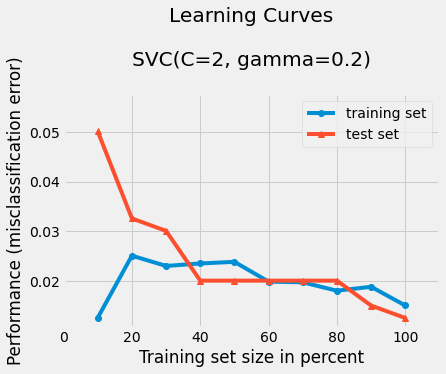

In [ ]:
# Learning curve
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, svm)

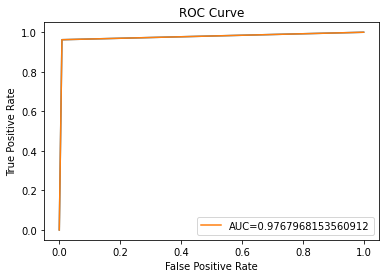

In [ ]:
################## ROC Curve
y_pred = y_pred.ravel()
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
import pickle
fileName = "/content/drive/MyDrive/ML_Results_Main/SVM_Numeric_98.74.model"
pickle.dump(svm, open(fileName, 'wb'))